In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
%matplotlib inline

In [2]:
departmentstore_train = pd.read_csv("H-departmentstore/train.csv",encoding='cp949')
departmentstore_test = pd.read_csv("H-departmentstore/train.csv",encoding='cp949')

In [3]:
departmentstore_train

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,NaN,14.0,디자이너부띠끄
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A


In [4]:
#총 구매액이 마이너스인 행 제거
list = []
for i, v in enumerate(departmentstore_train["총구매액"]) :
    if v < 0 :
        list.append(i)
departmentstore_train.drop(list,inplace=True)

In [5]:
departmentstore_train.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       944
겨울_구매건수       896
봄_구매건수        688
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

# Null값 처리

In [6]:
departmentstore_train[['구매건수','봄_구매건수','여름_구매건수','가을_구매건수',
                     '겨울_구매건수','아침_구매건수','점심_구매건수',
                     '저녁_구매건수']]

,구매건수,봄_구매건수,여름_구매건수,가을_구매건수,겨울_구매건수,아침_구매건수,점심_구매건수,저녁_구매건수
0,15,6.0,NaN,NaN,9.0,NaN,9.0,6.0
1,9,4.0,NaN,NaN,5.0,3.0,6.0,NaN
2,36,12.0,NaN,7.0,17.0,10.0,15.0,11.0
3,28,15.0,NaN,5.0,8.0,NaN,10.0,18.0
4,5,5.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...
4995,93,14.0,33.0,13.0,33.0,8.0,44.0,41.0
4996,17,6.0,1.0,4.0,6.0,3.0,14.0,NaN
4997,37,6.0,13.0,12.0,6.0,16.0,21.0,NaN
4998,13,2.0,1.0,6.0,4.0,NaN,11.0,2.0


In [7]:
#구매건수 Null값 처리 확인
weather_buy = departmentstore_train[['봄_구매건수','여름_구매건수','가을_구매건수',
                     '겨울_구매건수']]
time_buy = departmentstore_train[['아침_구매건수','점심_구매건수',
                     '저녁_구매건수']]
for i, v in enumerate(departmentstore_train['구매건수']):
    if (v!=weather_buy.iloc[i,:].sum()):
        print("w",i)
    if (v!=time_buy.iloc[i,:].sum()):
        print("t",i)

In [8]:
#계절별 구매건수의 합과 시간별 구매건수의 합은 각각 총구매건수와 같으므로
departmentstore_train.fillna(0,inplace=True)

In [9]:
departmentstore_train.isnull().sum()
# Null 값 처리 완료

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [10]:
departmentstore_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     4997 non-null   int64  
 1   gender     4997 non-null   int64  
 2   총구매액       4997 non-null   int64  
 3   구매건수       4997 non-null   int64  
 4   평균구매가격     4997 non-null   int64  
 5   평균할부개월수    4997 non-null   float64
 6   구매브랜드종류    4997 non-null   int64  
 7   내점일수       4997 non-null   int64  
 8   수입상품_구매비율  4997 non-null   float64
 9   주말방문비율     4997 non-null   float64
 10  가을_구매건수    4997 non-null   float64
 11  겨울_구매건수    4997 non-null   float64
 12  봄_구매건수     4997 non-null   float64
 13  여름_구매건수    4997 non-null   float64
 14  아침_구매건수    4997 non-null   float64
 15  저녁_구매건수    4997 non-null   float64
 16  점심_구매건수    4997 non-null   float64
 17  주구매코너      4997 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 741.7+ KB


# 파생변수 만들기

In [11]:
coner=pd.get_dummies(departmentstore_train['주구매코너'])
coner.head()

,가구,가전,기타바이어,니트단품,도자기크리스탈,디자이너부띠끄,문화완구,섬유,수입명품,스포츠,...,장신구,정장셔츠,조리욕실,침구수예,캐릭터캐주얼,타운모피,트래디셔널캐주얼,피혁A,피혁B,화장품
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
departmentstore_train = pd.concat([departmentstore_train,coner], axis=1)

In [13]:
departmentstore_train.drop('주구매코너',axis=1,inplace=True)

In [14]:
brand = pd.get_dummies(departmentstore_train['구매브랜드종류'])
brand.head()

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,99,100,102,104,109,112,134
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
departmentstore_train = pd.concat([departmentstore_train,brand], axis=1)

In [16]:
departmentstore_train.drop('구매브랜드종류', axis=1, inplace=True)

In [17]:
departmentstore_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 0 to 4999
Columns: 134 entries, custid to 134
dtypes: float64(10), int64(6), uint8(118)
memory usage: 1.2 MB


In [18]:
# 코너별 파생변수
dst = departmentstore_train

In [19]:
def createFeatures(x):
    x['아침구매액'] = np.round(x['총구매액']*(x['아침_구매건수'] /x['구매건수'] ), 2)
    x['점심구매액'] = np.round(x['총구매액']*(x['점심_구매건수'] /x['구매건수'] ), 2)
    x['저녁구매액'] = np.round(x['총구매액']*(x['저녁_구매건수'] /x['구매건수'] ), 2)  
    x['봄구매액']   = np.round(x['총구매액']*(x['봄_구매건수'] /x['구매건수'] ), 2) 
    x['여름구매액'] = np.round(x['총구매액']*(x['여름_구매건수'] /x['구매건수'] ), 2) 
    x['가을구매액'] = np.round(x['총구매액']*(x['가을_구매건수'] /x['구매건수'] ), 2)
    x['겨울구매액'] = np.round(x['총구매액']*(x['겨울_구매건수'] /x['구매건수'] ), 2)
    x['내점구매율'] = np.round(x['구매건수'] /x['내점일수'], 2)
    x['아침구매건수비율'] = np.round(x['아침_구매건수'] /x['구매건수']*100 , 2)
    x['점심구매건수비율'] = np.round(x['점심_구매건수'] /x['구매건수']*100 , 2)
    x['저녁구매건수비율'] = np.round(x['저녁_구매건수'] /x['구매건수']*100 , 2)  
    x['봄구매건수비율']   = np.round(x['봄_구매건수'] /x['구매건수']*100 , 2) 
    x['여름구매건수비율'] = np.round(x['여름_구매건수'] /x['구매건수']*100 , 2) 
    x['가을구매건수비율'] = np.round(x['가을_구매건수'] /x['구매건수']*100 , 2)  
    x['겨울구매건수비율'] = np.round(x['겨울_구매건수'] /x['구매건수']*100 , 2)
    x['아침매출비중'] = np.round(x['아침구매액'] /x['총구매액']*100 , 2)
    x['점심매출비중'] = np.round(x['점심구매액'] /x['총구매액']*100 , 2)
    x['저녁매출비중'] = np.round(x['저녁구매액'] /x['총구매액']*100 , 2)
    x['봄매출비중'] = np.round(x['봄구매액'] /x['총구매액']*100 , 2)
    x['여름매출비중'] = np.round(x['여름구매액'] /x['총구매액']*100 , 2)
    x['가을매출비중'] = np.round(x['가을구매액'] /x['총구매액']*100 , 2)
    x['겨울매출비중'] = np.round(x['겨울구매액'] /x['총구매액']*100 , 2)
    
createFeatures(dst)
dst


,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,...,여름구매건수비율,가을구매건수비율,겨울구매건수비율,아침매출비중,점심매출비중,저녁매출비중,봄매출비중,여름매출비중,가을매출비중,겨울매출비중
0,18,0,680100,15,45340,1.7,10,26.7,100.0,0.0,...,0.00,0.00,60.00,0.00,60.00,40.00,40.00,0.00,0.00,60.00
1,21,0,353450,9,39272,1.2,8,11.1,37.5,0.0,...,0.00,0.00,55.56,33.33,66.67,0.00,44.44,0.00,0.00,55.56
2,23,0,5671400,36,157539,2.8,16,5.6,37.5,7.0,...,0.00,19.44,47.22,27.78,41.67,30.56,33.33,0.00,19.44,47.22
3,26,0,1964000,28,70143,1.4,14,39.3,28.6,5.0,...,0.00,17.86,28.57,0.00,35.71,64.29,53.57,0.00,17.86,28.57
4,35,0,885000,5,177000,6.0,2,0.0,100.0,0.0,...,0.00,0.00,0.00,0.00,0.00,100.00,100.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,39,10.8,43.6,13.0,...,35.48,13.98,35.48,8.60,47.31,44.09,15.05,35.48,13.98,35.48
4996,49954,0,3112100,17,183065,3.6,13,29.4,38.5,4.0,...,5.88,23.53,35.29,17.65,82.35,0.00,35.29,5.88,23.53,35.29
4997,49957,1,5852482,37,158175,2.6,21,40.5,19.0,12.0,...,35.14,32.43,16.22,43.24,56.76,0.00,16.22,35.14,32.43,16.22
4998,49975,1,654498,13,50346,2.5,7,7.7,14.3,6.0,...,7.69,46.15,30.77,0.00,84.62,15.38,15.38,7.69,46.15,30.77


In [20]:
departmentstore_train=departmentstore_train.sort_values(by="총구매액")
Total=round(departmentstore_train["총구매액"]/1000000,0)
Total.rename("총구매액-백만단위",inplace=True)

4343     0.0
3221     0.0
4906     0.0
1155     0.0
1723     0.0
        ... 
4976    60.0
4164    65.0
3342    69.0
4703    85.0
2577    93.0
Name: 총구매액-백만단위, Length: 4997, dtype: float64

In [21]:
Total.describe().T

count    4997.000000
mean        3.349610
std         5.107378
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        93.000000
Name: 총구매액-백만단위, dtype: float64

In [22]:
for i, v in enumerate(Total):
    if (v > 24):
        Total=Total.replace(v,25)
        
Total.value_counts().sort_index()

0.0      888
1.0     1303
2.0      818
3.0      527
4.0      363
5.0      254
6.0      188
7.0      128
8.0      108
9.0       67
10.0      44
11.0      52
12.0      45
13.0      30
14.0      29
15.0      25
16.0      18
17.0       9
18.0      12
19.0       8
20.0       9
21.0       8
22.0       7
23.0      11
24.0       3
25.0      43
Name: 총구매액-백만단위, dtype: int64

In [23]:
departmentstore_train=pd.concat([departmentstore_train,Total],axis=1)

In [24]:
departmentstore_train=departmentstore_train.sort_values(by="평균구매가격")
Avg=round(departmentstore_train["평균구매가격"]/10000,0)
Avg.rename("평균구매가격-만단위",inplace=True)

4343     0.0
3960     0.0
2238     1.0
3967     1.0
1697     1.0
        ... 
2479    75.0
2424    75.0
4087    77.0
1894    88.0
3143    93.0
Name: 평균구매가격-만단위, Length: 4997, dtype: float64

In [25]:
Avg.describe().T

count    4997.000000
mean       10.264959
std         7.910873
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        93.000000
Name: 평균구매가격-만단위, dtype: float64

In [26]:
# for i, v in enumerate(Avg):
#     if (v <= 5.48) :
#         Avg=Avg.replace(v,1)
#     elif ((v > 5.48) and (v <= 8.22)) :
#         Avg=Avg.replace(v,2)
#     elif ((v > 8.22) and (v <= 12.42)) :
#         Avg=Avg.replace(v,3)
#     elif (v > 12.42) :
#         Avg=Avg.replace(v,4)

for i, v in enumerate(Avg):
    if (v > 49) :
        Avg=Avg.replace(v,50)
        
Avg.value_counts().sort_index()

0.0       2
1.0      15
2.0     104
3.0     249
4.0     447
5.0     443
6.0     477
7.0     433
8.0     453
9.0     362
10.0    305
11.0    247
12.0    229
13.0    183
14.0    164
15.0    123
16.0    105
17.0     79
18.0     70
19.0     52
20.0     70
21.0     35
22.0     49
23.0     36
24.0     24
25.0     26
26.0     26
27.0     21
28.0     13
29.0     12
30.0     14
31.0     17
32.0     11
33.0      6
34.0      5
35.0      4
36.0      5
37.0      8
38.0      3
39.0      2
40.0     10
41.0      4
42.0      3
43.0      3
44.0      3
45.0      3
46.0      4
47.0      1
48.0      5
49.0      2
50.0     30
Name: 평균구매가격-만단위, dtype: int64

In [27]:
departmentstore_train=pd.concat([departmentstore_train,Avg],axis=1)

In [28]:
departmentstore_train.drop(["총구매액","평균구매가격"],axis=1,inplace=True)

In [29]:
departmentstore_train

,custid,gender,구매건수,평균할부개월수,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,...,겨울구매건수비율,아침매출비중,점심매출비중,저녁매출비중,봄매출비중,여름매출비중,가을매출비중,겨울매출비중,총구매액-백만단위,평균구매가격-만단위
4343,43255,0,9,4.3,4,66.7,0.0,1.0,0.0,0.0,...,0.00,22.22,33.33,44.44,0.00,88.89,11.11,0.00,0.0,0.0
3960,39630,0,14,2.9,10,7.1,50.0,6.0,7.0,1.0,...,50.00,7.14,85.71,7.14,7.14,0.00,42.86,50.00,0.0,0.0
2238,22860,1,12,1.7,10,33.3,70.0,1.0,1.0,10.0,...,8.33,0.00,91.67,8.33,83.33,0.00,8.33,8.33,0.0,1.0
3967,39660,0,93,1.2,60,1.1,15.0,21.0,11.0,32.0,...,11.83,13.98,55.91,30.11,34.41,31.18,22.58,11.83,1.0,1.0
1697,17280,0,7,2.7,3,42.9,66.7,7.0,0.0,0.0,...,0.00,71.43,28.57,0.00,0.00,0.00,100.00,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,25117,0,44,3.9,30,77.3,26.7,6.0,16.0,22.0,...,36.36,31.82,52.27,15.91,50.00,0.00,13.64,36.36,25.0,50.0
2424,24640,0,4,2.0,4,25.0,50.0,1.0,1.0,1.0,...,25.00,0.00,50.00,50.00,25.00,25.00,25.00,25.00,3.0,50.0
4087,40700,0,28,2.9,11,39.3,63.6,2.0,5.0,16.0,...,17.86,25.00,64.29,10.71,57.14,17.86,7.14,17.86,22.0,50.0
1894,19178,1,11,2.6,10,72.7,40.0,3.0,6.0,2.0,...,54.55,9.09,81.82,9.09,18.18,0.00,27.27,54.55,10.0,50.0


In [30]:
departmentstore_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 4343 to 3143
Columns: 156 entries, custid to 평균구매가격-만단위
dtypes: float64(34), int64(4), uint8(118)
memory usage: 2.0 MB


# 데이터 나누기

In [31]:
dtX = departmentstore_train.drop(['custid','gender'], axis=1)
dtY = departmentstore_train['gender']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(dtX, dtY, test_size=0.25, random_state=0)

# Cross-Validation

In [33]:
#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()

In [34]:
scores = cross_val_score(model, dtX, dtY); scores

array([0.696     , 0.697     , 0.66866867, 0.69169169, 0.68868869])

In [35]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))
# 분산이 작으면 Overfitting 이 적다

Mean: 0.688
Std: 0.010
Min: 0.669
Max: 0.697


# MinMaxScaler

In [36]:
scaler = MinMaxScaler()
scaler.fit(dtX)

MinMaxScaler()

In [37]:
x = scaler.transform(dtX)
dtX_s = pd.DataFrame(x,columns=dtX.columns)

In [38]:
dtX_s.describe().T

,count,mean,std,min,25%,50%,75%,max
구매건수,4997.0,0.068467,0.081875,0.0,0.018367,0.040816,0.087755,1.0
평균할부개월수,4997.0,0.101732,0.081164,0.0,0.044444,0.088889,0.133333,1.0
내점일수,4997.0,0.068791,0.078119,0.0,0.020161,0.044355,0.088710,1.0
수입상품_구매비율,4997.0,0.179950,0.194876,0.0,0.050000,0.125000,0.250000,1.0
주말방문비율,4997.0,0.385614,0.245046,0.0,0.222000,0.348000,0.500000,1.0
...,...,...,...,...,...,...,...,...
여름매출비중,4997.0,0.253493,0.215694,0.0,0.086200,0.233800,0.357100,1.0
가을매출비중,4997.0,0.229211,0.193069,0.0,0.087000,0.210500,0.322200,1.0
겨울매출비중,4997.0,0.239579,0.208021,0.0,0.090900,0.209500,0.333300,1.0
총구매액-백만단위,4997.0,0.129414,0.166942,0.0,0.040000,0.080000,0.160000,1.0


# 남여 비율 조정 복합 스케일링

In [39]:
# departmentstore_train['gender'].value_counts()

In [40]:
# from imblearn.combine import *

In [41]:
# from imblearn.combine import SMOTETomek

In [42]:
#scores = cross_val_score(model, dtX, dtY); scores

In [43]:
# from sklearn.metrics import classification_report

In [44]:
# tree = DecisionTreeClassifier(max_depth=6, random_state=0)
# tree.fit(X_train, Y_train)
# pred_tree = tree.predict(X_test);

# print(classification_report(Y_test, pred_tree))

In [45]:
# from imblearn.under_sampling import TomekLinks
# from imblearn.combine import SMOTETomek

In [46]:
# dtX, dtY = SMOTETomek(random_state=0).fit_sample(X_train, Y_train)

In [47]:
# tree = DecisionTreeClassifier(max_depth=6, random_state=0)
# tree.fit(dtX, dtY)
# pred_tree = tree.predict(X_test)

# print(classification_report(Y_test, pred_tree))
# (precision) 0 이라고 예측한 데이터의 74%만 실제로 0
# (precision) 1 이라고 예측한 데이터의 33%만 실제로 1
# (recall) 실제 0인 데이터중 56%만 0으로 판별됨 
# (recall) 실제 1인 데이타중 52%만 1로 판별됨

# 언더 샘플링 / 오버 샘플링

In [48]:
aX = np.array(dtX)
aY = np.array(dtY)
print(np.sum(aY == 1), np.sum(aY == 0))

1520 3477


In [49]:
sampler = RandomUnderSampler(random_state=1)
#sampler = RandomOverSampler(random_state=1)
aX, aY = sampler.fit_resample(aX, aY)

In [50]:
print(np.sum(aY == 1), np.sum(aY == 0))

1520 1520


# K-Fold 교차검증

In [51]:
kf = KFold(n_splits=10, shuffle=True)

In [52]:
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [53]:
scores = []

In [54]:
from sklearn.metrics import accuracy_score
for train_id, test_id in kf.split(aX):
    x = aX[train_id]
    y = aY[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    pred_y = clf.predict(aX[test_id])
    score = accuracy_score(aY[test_id], pred_y)
    scores.append(score)

scores = np.array(scores)
print(scores.mean(), scores.std(), scores.max(), scores.min())

0.5315789473684209 0.028835009211593595 0.5822368421052632 0.46710526315789475


In [55]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(recall_score(aY[test_id], pred_y))
print(precision_score(aY[test_id], pred_y))

0.49324324324324326
0.5447761194029851


In [56]:
print(clf)

DecisionTreeClassifier()


In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# 패러메터 범위설정
params = {
    'criterion': ['entropy'],    
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50],
}

In [59]:
clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
                cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [60]:
tree11 = DecisionTreeClassifier(max_depth=6, random_state=0)
tree11.fit(aX, aY).score(aX[test_id],aY[test_id])

0.6480263157894737

In [61]:
clf_gs.fit(aX, aY)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [62]:
# 가장 높은 성능일 때의 모델에 대한 정밀도와 파라미터 조합 확인
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.5802631578947367
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 40}


In [63]:
from sklearn.dummy import DummyClassifier
print(Y_test.value_counts())
dummy=DummyClassifier(strategy='most_frequent').fit(aX, aY)
dummy.score(X_test, Y_test)

0    872
1    378
Name: gender, dtype: int64


0.6976

In [64]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

In [65]:
svm = SVC(random_state=0)
svm.fit(dtX, dtY)

SVC(random_state=0)

In [66]:
mlp=MLPClassifier()
mlp.fit(dtX, dtY)

MLPClassifier()

In [67]:
display(svm.score(dtX, dtY))
display(svm.score(X_test, Y_test))

0.706824094456674

0.7096

In [68]:
display(mlp.score(dtX, dtY))
display(mlp.score(X_test, Y_test))

0.5493295977586552

0.568

# xgboost

In [69]:
import xgboost as xgb
from xgboost import XGBClassifier

In [70]:
from xgboost import plot_importance

In [71]:
dtrain = xgb.DMatrix(data=dtX, label=dtY)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [72]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [73]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[18:08:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67518	eval-logloss:0.67471
[1]	train-logloss:0.66050	eval-logloss:0.65995
[2]	train-logloss:0.64828	eval-logloss:0.64724
[3]	train-logloss:0.63814	eval-logloss:0.63702
[4]	train-logloss:0.62972	eval-logloss:0.62825
[5]	train-logloss:0.62269	eval-logloss:0.62100
[6]	train-logloss:0.61644	eval-logloss:0.61455
[7]	train-logloss:0.61097	eval-logloss:0.60898
[8]	train-logloss:0.60656	eval-logloss:0.60443
[9]	train-logloss:0.60260	eval-logloss:0.60041
[10]	train-logloss:0.59932	eval-logloss:0.59676
[11]	train-logloss:0.59618	eval-logloss:0.59354
[12]	train-logloss:0.59327	eval-logloss:0

[162]	train-logloss:0.50463	eval-logloss:0.50246
[163]	train-logloss:0.50413	eval-logloss:0.50188
[164]	train-logloss:0.50352	eval-logloss:0.50116
[165]	train-logloss:0.50298	eval-logloss:0.50039
[166]	train-logloss:0.50249	eval-logloss:0.49976
[167]	train-logloss:0.50181	eval-logloss:0.49926
[168]	train-logloss:0.50141	eval-logloss:0.49895
[169]	train-logloss:0.50103	eval-logloss:0.49867
[170]	train-logloss:0.50042	eval-logloss:0.49762
[171]	train-logloss:0.50008	eval-logloss:0.49728
[172]	train-logloss:0.49953	eval-logloss:0.49640
[173]	train-logloss:0.49892	eval-logloss:0.49576
[174]	train-logloss:0.49869	eval-logloss:0.49543
[175]	train-logloss:0.49817	eval-logloss:0.49479
[176]	train-logloss:0.49774	eval-logloss:0.49451
[177]	train-logloss:0.49730	eval-logloss:0.49404
[178]	train-logloss:0.49668	eval-logloss:0.49356
[179]	train-logloss:0.49651	eval-logloss:0.49335
[180]	train-logloss:0.49601	eval-logloss:0.49287
[181]	train-logloss:0.49579	eval-logloss:0.49261
[182]	train-logloss:

[330]	train-logloss:0.44271	eval-logloss:0.44012
[331]	train-logloss:0.44225	eval-logloss:0.43955
[332]	train-logloss:0.44205	eval-logloss:0.43933
[333]	train-logloss:0.44189	eval-logloss:0.43914
[334]	train-logloss:0.44175	eval-logloss:0.43900
[335]	train-logloss:0.44156	eval-logloss:0.43880
[336]	train-logloss:0.44110	eval-logloss:0.43807
[337]	train-logloss:0.44077	eval-logloss:0.43772
[338]	train-logloss:0.44030	eval-logloss:0.43716
[339]	train-logloss:0.43989	eval-logloss:0.43668
[340]	train-logloss:0.43943	eval-logloss:0.43611
[341]	train-logloss:0.43904	eval-logloss:0.43581
[342]	train-logloss:0.43861	eval-logloss:0.43544
[343]	train-logloss:0.43837	eval-logloss:0.43504
[344]	train-logloss:0.43799	eval-logloss:0.43474
[345]	train-logloss:0.43777	eval-logloss:0.43457
[346]	train-logloss:0.43728	eval-logloss:0.43422
[347]	train-logloss:0.43707	eval-logloss:0.43405
[348]	train-logloss:0.43697	eval-logloss:0.43393
[349]	train-logloss:0.43687	eval-logloss:0.43382
[350]	train-logloss:

In [74]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.4 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.876 0.128 0.209 0.12  0.524 0.272 0.835 0.39  0.747 0.239]


In [75]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [76]:
get_clf_eval(Y_test, preds)

오차행렬
[[812  60]
 [122 256]]
정확도: 0.8544, 정밀도: 0.8101, 재현율: 0.6772


# LightGBM

In [77]:
dtX.columns

Index([      '구매건수',    '평균할부개월수',       '내점일수',  '수입상품_구매비율',     '주말방문비율',
          '가을_구매건수',    '겨울_구매건수',     '봄_구매건수',    '여름_구매건수',    '아침_구매건수',
       ...
         '겨울구매건수비율',     '아침매출비중',     '점심매출비중',     '저녁매출비중',      '봄매출비중',
           '여름매출비중',     '가을매출비중',     '겨울매출비중',  '총구매액-백만단위', '평균구매가격-만단위'],
      dtype='object', length=154)

In [78]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(dtX, dtY, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.602824	valid_0's binary_logloss: 0.602824
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.595603	valid_0's binary_logloss: 0.595603
[3]	valid_0's binary_logloss: 0.589021	valid_0's binary_logloss: 0.589021
[4]	valid_0's binary_logloss: 0.582816	valid_0's binary_logloss: 0.582816
[5]	valid_0's binary_logloss: 0.577713	valid_0's binary_logloss: 0.577713
[6]	valid_0's binary_logloss: 0.571385	valid_0's binary_logloss: 0.571385
[7]	valid_0's binary_logloss: 0.56581	valid_0's binary_logloss: 0.56581
[8]	valid_0's binary_logloss: 0.56075	valid_0's binary_logloss: 0.56075
[9]	valid_0's binary_logloss: 0.555771	valid_0's binary_logloss: 0.555771
[10]	valid_0's binary_logloss: 0.551196	valid_0's binary_logloss: 0.551196
[11]	valid_0's binary_logloss: 0.5473	valid_0's binary_logloss: 0.5473
[12]	valid_0's binary_logloss: 0.543373	valid_0's binary_logloss: 0.543373
[13]	valid_0's binary_logloss: 0.5384	valid_0's binary

In [79]:
get_clf_eval(Y_test, preds)

오차행렬
[[812  60]
 [122 256]]
정확도: 0.8544, 정밀도: 0.8101, 재현율: 0.6772


# PR curve

In [80]:
from sklearn.metrics import precision_recall_curve

In [81]:
def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [82]:
precisions, recalls, _ = precision_recall_curve(Y_test, 
                                    clf.predict_proba(X_test)[:,1])

In [83]:
precisions

array([0.3024    , 0.59173554, 0.5920398 , 1.        ])

In [84]:
recalls

array([1.        , 0.94708995, 0.94444444, 0.        ])

In [85]:
_

array([0. , 0.5, 1. ])

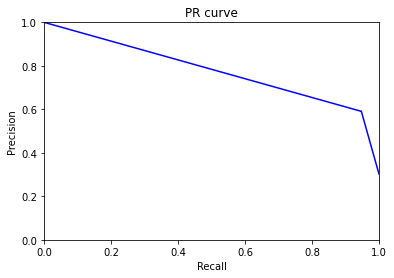

In [86]:
plot_precision_recall_curve(precisions, recalls)

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [88]:
fpr, tpr, _ = roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.8320849109266539

In [89]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

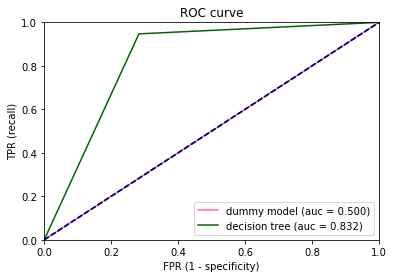

In [90]:
fpr_dummy, tpr_dummy, _ = roc_curve(Y_test, 
                                    dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(Y_test, 
                                  clf.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'decision tree', 'darkgreen')

In [91]:
# import seaborn as sns

In [92]:
# plt.rcParams['figure.figsize'] = [50, 50]
# plt.rc('font', family='Malgun Gothic')
# sns.heatmap(departmentstore_train.corr(), annot=True)

In [93]:
# plt.rc('font', family='Malgun Gothic')
# departmentstore_train.hist(bins=30, figsize=(30,20))

In [94]:
# departmentstore_train.groupby(['gender'])['평균할부개월수'].mean()

In [95]:
# plt.rcParams["figure.figsize"] = (8,8) #그래프 크기설정
# plt.figure() #그래프 설정 시작
# #막대그래프 표현
# plt.bar(departmentstore_train['gender'],departmentstore_train['평균할부개월수'].mean(),label='평균할부개월수')
# plt.legend() #범주 표시
# plt.xlabel('성별') #x축 라벨 설정
# plt.ylabel('평균할부개월수') #y축 라벨 설정
# plt.ylim(0,2) #데이터축 범위 설정
# plt.title("성별 평균할부개월수") #그래프 제목 설정
# plt.xticks(departmentstore_train['gender'])#x축 값에 맞게 값이 설정?
# plt.grid()
# plt.text(1)

In [96]:
# for i, v in enumerate(departmentstore_train['평균할부개월수']):
#     print(i,v)

In [17]:
# """for i, v in enumerate(departmentstore_train['평균할부개월수']):
#     st"""